     ID    Reason for absence    Month of absence    Day of the week  \
0    11                    26                   7                  3   
1    36                     0                   7                  3   
2     3                    23                   7                  4   
3     7                     7                   7                  5   
4    11                    23                   7                  5   
..   ..                   ...                 ...                ...   
735  11                    14                   7                  3   
736   1                    11                   7                  3   
737   4                     0                   0                  3   
738   8                     0                   0                  4   
739  35                     0                   0                  6   

       Seasons    Transportation expense    Distance from Residence to Work  \
0            1                       289                

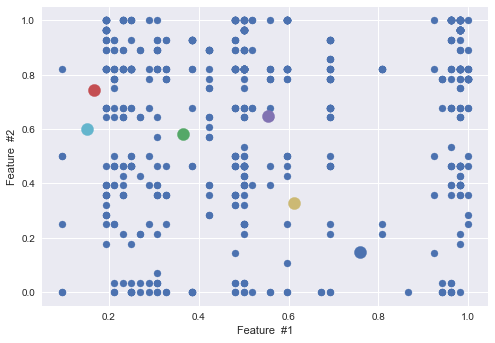

hood is:   0.225


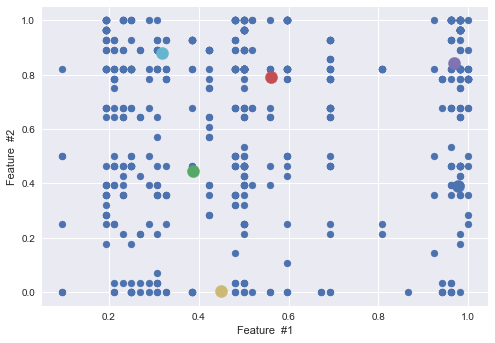

hood is:   0.2


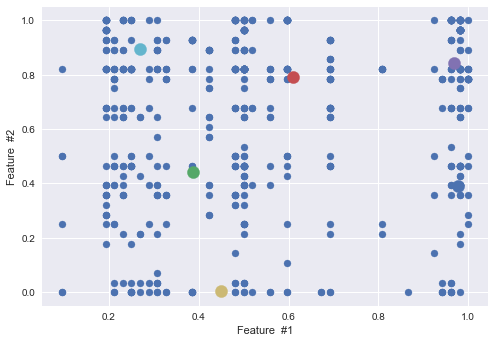

hood is:   0.17500000000000002


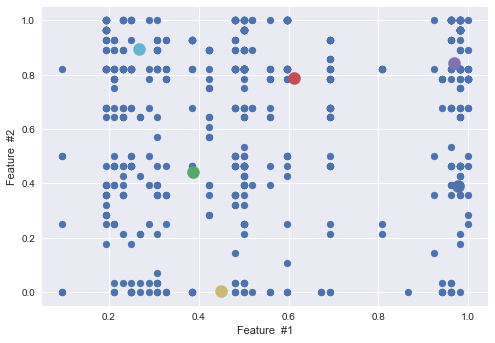

hood is:   0.15000000000000002


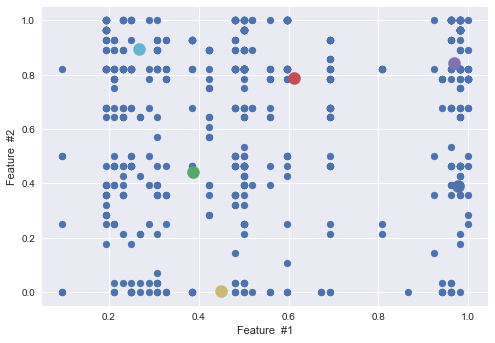

hood is:   0.12500000000000003


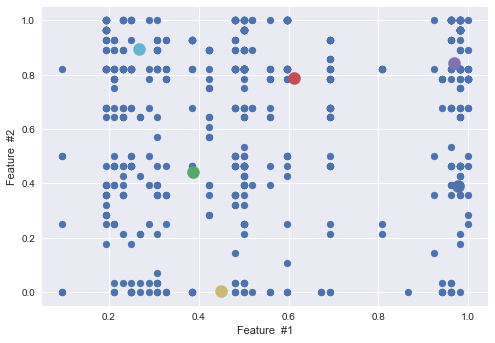

hood is:   0.10000000000000003


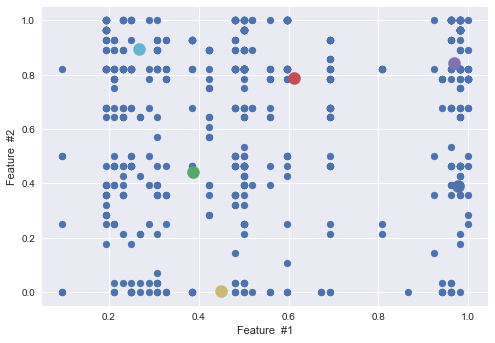

hood is:   0.07500000000000004


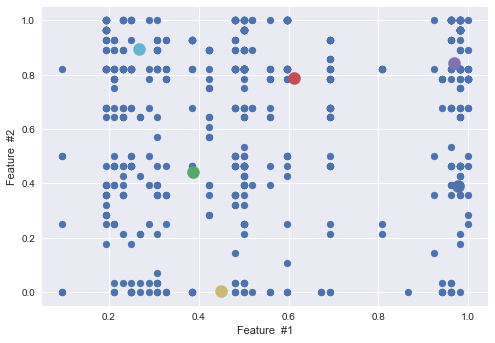

hood is:   0.05000000000000004


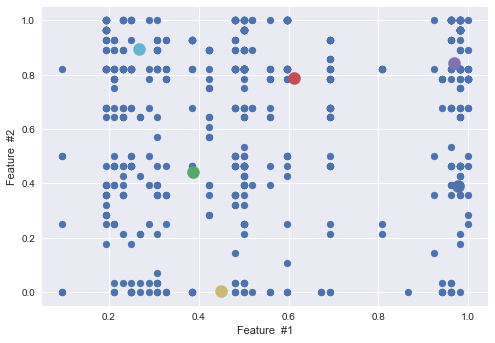

hood is:   0.025000000000000036


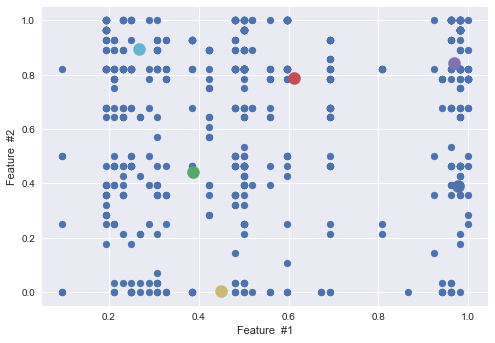

hood is:   3.469446951953614e-17

The final weights: 
 [[0.3881 0.4441]
 [0.6126 0.7891]
 [0.9679 0.842 ]
 [0.4484 0.0046]
 [0.2672 0.8944]
 [0.9767 0.3917]]
FIN


In [4]:
import sys, os
import time
import numpy as np, numpy.random
import matplotlib.pyplot as plt 
from scipy.spatial import distance
import pandas as pd

sys.path.append(os.path.realpath('..'))
df = pd.read_csv ("absenteeism.csv")
print(df)

np.set_printoptions(suppress=True)

Z = df.to_numpy()
X = np.asarray(Z, dtype = np.float64, order ='C')
print(X)
n=len(X)
print("length of x is ")
print(len(X))
#d=len(X[0])
d=2

Orgn = numpy.zeros(d)
np.random.shuffle(X)
x1=[]
y1=[]

for row in range(len(X)):
    x1.append(X[row,6])
    y1.append(X[row,1])
    vec3 = [x1[row],y1[row]]
    x1[row] = x1[row]/max(X[:,6])
    y1[row] = y1[row]/max(X[:,1])
    #  Below is alt normalizing function.
    #x1[row] = x1[row]/distance.euclidean(Orgn[:],vec3[:])
    #y1[row] = y1[row]/distance.euclidean(Orgn[:],vec3[:])

print ("X is: ", X)
k=6 # Trainable neurons
alpha=0.25 #  learning rate
hood=0.25 #  Neighborhood area
hoodweight=0.25 #  Modifier for distance travelled by neighboring neurons
epochs = 10 #Epochs

print("\n Total Amount of Data: ", n)
print("Total number of features: ",d)
print("Total number of clusters: ",k)

#  Randomly initialize weights
neuralw = np.random.rand(k,d)
print("\nThe inital weights: \n", np.round(neuralw,2))


hooditer = hood/epochs
for it in range(epochs):
    #plotting
    plt.style.use('seaborn')
    plt.scatter(x1,y1)
    for j in range(k):
        plt.scatter(neuralw[j,0],neuralw[j,1],s = 150)
    plt.xlabel('Feature  #1')
    plt.ylabel('Feature  #2')
    plt.show()
    for i in range(n):
        distMin = 99999999
        vec = [x1[i],y1[i]]
        #print("original weights are ", neuralw[0],neuralw[1],neuralw[2])
        for j in range(k):
            dist = distance.euclidean(neuralw[j],vec[:])
            #print("neuralw[j] is ", neuralw[j])
            #print("vec 0 is ", vec[:])
            if distMin > dist:
                distMin = dist
                jMin = j
        neuralw[jMin] = neuralw[jMin] + alpha*(vec[:] - neuralw[jMin])
       # print("sub is : ", neuralw[jMin] - vec[:])
        for j in range(k):
            if distance.euclidean(neuralw[j],neuralw[jMin]) <= hood and j != jMin:
                neuralw[j] = neuralw[j] + alpha*hoodweight*(vec[:] - neuralw[j])
    hood = hood-(hooditer)
    print("hood is:  ", hood)

print("\nThe final weights: \n",np.round(neuralw,4))
print ("FIN")